![Wishbone as Sherlock Holmes](images_and_gifs/wishbone.jpg)

## **🧑‍💻📊 Introduction: Burgh Data Detectives Search for the Best Neighborhood in Pittsburgh 🕵️**

**Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.**

Our analysis focused on identifying the neighborhood that excelled across three key metrics:

1. the lowest number of arrests ⛓️⬇️
2. the fewest illegal dumping sites 🚯🗑️⬇️
3. the highest amount of playgrounds ⚽🛝⬆️
    
We believe that these metrics are **the most important factors** in identifying the **healthiest, safest, and the most enjoyable neighborhood** to live in and **establish your family.** <ins>Each team member</ins> analyzed a specific data set and <ins>ranked neighborhoods accordingly.</ins> We then used a **_straightforward average calculation to rank all of the neighborhoods_** which enabled us to pinpoint the best neighborhood.

![Photograph of the Three Rivers, downtown Pittsburgh, National Geographic](images_and_gifs/pcpittsburghskyline-with-the-duquesne-inclinecredit-dustin-mcgrewhr_3x2.png)

## **🧮 The Metrics 📐**

**Describe your metric, and what features are you measuring. What datasets are you using?**

**Police Arrest Data - (Bridget)** The first metric is <ins>Pittsburgh Police Arrest Data.</ins> The best neighborhood must have <ins>fewer</ins> arrests on average compared to the other neighborhoods.

**Allegheny County Illegal Dump Sites - (Paul)** The second metric is <ins>Illegal Dump Sites.</ins> The best neighborhood must have <ins>fewer</ins> illegal dumpsites on average compared to the other neighborhoods.

**City of Pittsburgh Playgrounds - (Steven)** The third metric is <ins> City of Pittsburgh Playgrounds.</ins> The best neighborhood must have a <ins>higher</ins> amount of playgrounds compared to other neighborhoods.

## **💯☝️ The Best Neighborhood 🥇**

**Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.**

**Our Method:**

- First, each team member will individually rank all of the neighborhoods from 1st place to nth place (where n is the number of neighborhoods) based on our chosen metrics
- Next, the rankings will be combined, and an average ranking will be calculated for each neighborhood
- The neighborhood with the highest average ranking (1st place) will be identified as the best neighborhood in Pittsburgh

## **The Rankings: 📈** 
- 🏅1st place neighborhood, to last place neighborhood displayed in the graph below, from top to bottom
- reads in the 3 csv files with the data on police arrests, illegal dump sites, and playgrounds
- counts the number of arrests, trash sites, and playgrounds in each neighborhood
- merges the counts into a single dataframe, excluding neighborhoods not included in all data sets
- standardizes the data using z-score normalization to put them on the same scale for fair comparison
- calculates a combined score for each neighborhood based on the standardized data using a weighted sum (equal weights, so each of the 3 data metric contribute 1/3 weight)
- ranks the neighborhoods based on their combined scores and creates a bar chart to visualize the rankings

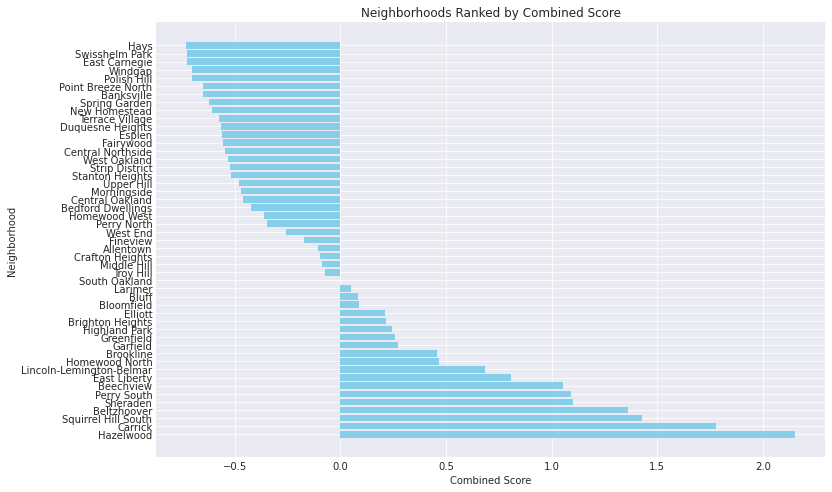

In [2]:
import pandas as pd

# read the police data CSV file
police_data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
# count the number of arrests in each neighborhood
neighborhood_arrests_counts = police_data['INCIDENTNEIGHBORHOOD'].value_counts()

# read the trash data CSV file
trash_data = pd.read_csv("IllegalTrash.csv")
# count the number of trash sites in each neighborhood
neighborhood_trash_counts = trash_data['Neighborhood'].value_counts()

# read the playgrounds data CSV file
playgrounds_data = pd.read_csv("Pittsburgh_Playgrounds.csv")
# count the number of playgrounds in each neighborhood
neighborhood_playgrounds_counts = playgrounds_data['neighborhood'].value_counts()

# merge counts into a single dataframe, excluding neighborhoods not included in all data sets
combined_counts = pd.concat([neighborhood_arrests_counts, neighborhood_trash_counts, neighborhood_playgrounds_counts], axis=1, join='inner')
combined_counts.columns = ['Number of Arrests', 'Number of Trash Sites', 'Number of Playgrounds']

# standardize the data using z-score normalization # shout out to stat 1152 for helping
def standardize_data(df):
    return (df - df.mean()) / df.std()
# standardize police arrests, dump sites, and playgrounds data
police_arrests_standardized = standardize_data(combined_counts[['Number of Arrests']])
dump_sites_standardized = standardize_data(combined_counts[['Number of Trash Sites']])
playgrounds_standardized = standardize_data(combined_counts[['Number of Playgrounds']])

# combine standardized data into a single dataframe
combined_data = pd.DataFrame({
    'Neighborhood': combined_counts.index,
    'Police Arrests': police_arrests_standardized['Number of Arrests'],
    'Dump Sites': dump_sites_standardized['Number of Trash Sites'],
    'Playgrounds': playgrounds_standardized['Number of Playgrounds']
})

# weights will all be equal for our 3 data sets, since we believe each metric is of equal importance
weights = {'Police Arrests': 1 / 3, 'Dump Sites': 1 / 3, 'Playgrounds': 1 / 3}

# calculate combined score using weighted sum
combined_data['Combined Score'] = (combined_data['Police Arrests'] * weights['Police Arrests'] +
                                   combined_data['Dump Sites'] * weights['Dump Sites'] +
                                   combined_data['Playgrounds'] * weights['Playgrounds'])

# rank neighborhoods based on combined score
ranked_neighborhoods = combined_data[['Neighborhood', 'Combined Score']].sort_values(by='Combined Score').reset_index(drop=True)

import matplotlib.pyplot as plt

# set the style of the plot
plt.style.use('seaborn-darkgrid')

# create a bar chart of neighborhoods ranked by combined score
plt.figure(figsize=(12, 8))
plt.barh(ranked_neighborhoods['Neighborhood'], ranked_neighborhoods['Combined Score'], color='skyblue')
plt.xlabel('Combined Score')
plt.ylabel('Neighborhood')
plt.title('Neighborhoods Ranked by Combined Score')
plt.gca().invert_yaxis()  # invert y-axis to show highest scores at the top
plt.show()

- our winner is at the top!
- values close to the winner are also good neighborhoods!
- the values that get further and further away are bad...

## **🥁 The Winner: 🥁** 
## **🥇👏 #1 HAYS!!! 🥇👏** 

## **Top 10:**

In [3]:
top_10_neighborhoods = ranked_neighborhoods.head(10)
top_10_neighborhoods.index = top_10_neighborhoods.index + 1  # Adjusting index to start from 1
print("\nTop 10 Neighborhoods by Combined Score:")
print(top_10_neighborhoods[['Neighborhood', 'Combined Score']])


Top 10 Neighborhoods by Combined Score:
          Neighborhood  Combined Score
1                 Hays       -0.729388
2       Swisshelm Park       -0.727153
3        East Carnegie       -0.724115
4              Windgap       -0.702449
5          Polish Hill       -0.701439
6   Point Breeze North       -0.651217
7           Banksville       -0.650002
8        Spring Garden       -0.620221
9        New Homestead       -0.607041
10     Terrace Village       -0.572831


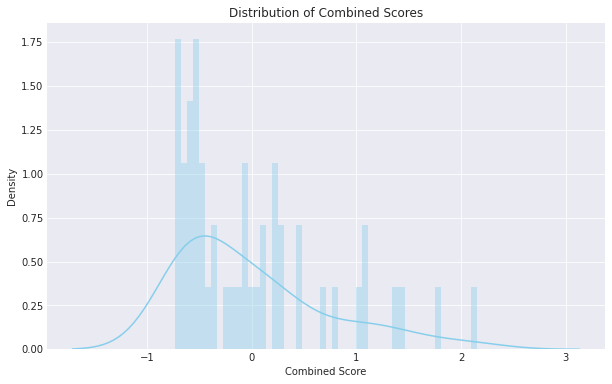

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with KDE for combined scores
sns.distplot(combined_data['Combined Score'], kde=True, bins=50, ax=ax, color='skyblue')  # Adjust bins as needed

# Set labels and title
plt.xlabel('Combined Score')
plt.ylabel('Density')
plt.title('Distribution of Combined Scores')

# Show the plot
plt.show()

<-- best / average (peak) / worst -->

- the "most likely" or "most average" neighborhoods in Pittsburgh are clustered around the peak of the graph
- neighborhoods that excelled across our 3 metrices are plotted to the left of the peak
- neighborhoods that fell short in some way are plotted further and further to the right of the peak

## **📝👏 Conclusion 🙇**

**Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.**

**Police Arrest Data - (Bridget)** My favorite neighborhoods in Pittsburgh are Oakland (because of Pitt, Phipps, and the many places you can walk to), Cranberry (Whole Foods, shopping), McCandless (restaurants, shopping, North Park), and Shadyside (restaurants, shopping). Out of these neighborhoods, North Oakland had 455 arrests, South Oakland had 354 arrests, Central Oakland had 521 arrests, and West Oakland had 325 arrests. Shadyside had 971 arrests. Cranberry and McCandless were not included in the data set. Oakland ranked in the mid 40s, and Shadyside ranked 76. Since my data set included 98 neighborhoods, ranking mid 40s is pretty good. I think when choosing a neighborhood, one must factor in more data sets (>3) to make a well-rounded decision. Ultimately, living somewhere and getting experience in that location is the best way to find out whether you like to live there or not.

**Allegheny County Illegal Dump Sites - (Paul)** 
I don't have a favorite neighborhood. I don't know much about Pittsburgh and I have not explored Pittsburgh that much, but Bakery Square is my favorite place I've visisted so I guess Larimer. Larimer ranked high (bad 57) on the total aomunt of trash, but low (good 1) on the number of sites, so considering any neighborhood on this list would not be considered the best, Larimer's a solid mid. My data set was very old and wasn't the best. I also think there's more to a neighborhood than how dirty and how illegal it is.

**Playgrounds - (Steven)** By a wide a margin, Squirrel Hill South is the "best" neighborhood in Pittsburgh, with a total of 8 plagrounds. The neighborhoods of Beechview and Southside Slopes came in second with 5 playgrounds each Sheraden, Beltzhoover, and Highland Park rounded out third place, having 4 parks per neighborhood. Additional Notes: Since the dataset is first and foremost a total list of the playgrounds in the City of Pittsburgh, there were quite a number of neighborhoods that were not included in the dataset at all, as they had no designated playgrounds at all. The dataset has not been updated since 2021, so it should be noted additional playgrounds may have been built in the meantime.



![Pittsburgh Pirates GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExM3kxMWhrdWZqajBzcXk3ZnVtYXJ3bHhwNzcwNmhsOTA0OWlxdnEwOSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/iGwd5890587S5JIdJQ/giphy.gif)